In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy

from datafold import (
    EDMD,
    DMDStandard,
    GaussianKernel,
    TSCPolynomialFeatures,
    TSCRadialBasis,
    TSCDataFrame
)
from datafold.utils._systems import Hopf
from datafold.utils.general import generate_2d_regular_mesh

In [2]:
df = pd.read_csv("result_df.csv")
#df = pd.read_csv("result_df.csv", index_col=[0, 1, 2], header=[0])

#tscdf = TSCDataFrame.from_csv("result_df.csv")
#tscdf
df.head()
data = df.drop("run_id", axis = 'columns')

data.to_csv('out.csv', sep='\t')
data.head()

,id,timeStep,faceId,meshDensityCounting-PID4
0,0,1,1,0
1,0,1,2,23
2,0,1,3,0
3,0,1,4,20
4,0,1,5,28


In [213]:
row= data.shape[0]
series1=[]
for i in range(0,row):
    if data['id'].iloc[i] ==0 and data['faceId'].iloc[i]==1:
        series1.append(data['meshDensityCounting-PID4'].iloc[i])
series2=[]
for i in range(0,row):
    if data['id'].iloc[i] ==0 and data['faceId'].iloc[i]==2:
        series2.append(data['meshDensityCounting-PID4'].iloc[i])
#series1

In [214]:
ser1=pd.DataFrame(series1, columns=['meshDensityCounting-PID4'])
ser2=pd.DataFrame(series2, columns=['meshDensityCounting-PID4'])

In [215]:
tsc_regular1 = TSCDataFrame.from_frame_list([ser1])
tsc_regular1

feature  meshDensityCounting-PID4
ID time                          
0  0                            0
   1                            0
   2                            2
   3                            3
   4                            6
...                           ...
   1246                         0
   1247                         0
   1248                         0
   1249                         0
   1250                         0

[1251 rows x 1 columns]

<Axes: xlabel='time'>

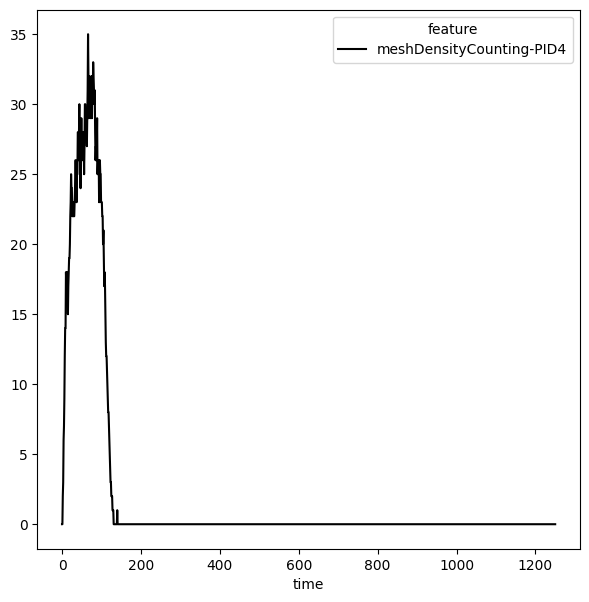

In [216]:
tsc_regular1.plot(figsize=(7, 7))

In [217]:
tsc_regular2 = TSCDataFrame.from_frame_list([ser2])
tsc_regular2

feature  meshDensityCounting-PID4
ID time                          
0  0                           23
   1                           27
   2                           26
   3                           25
   4                           29
...                           ...
   1246                         0
   1247                         0
   1248                         0
   1249                         0
   1250                         0

[1251 rows x 1 columns]

<Axes: xlabel='time'>

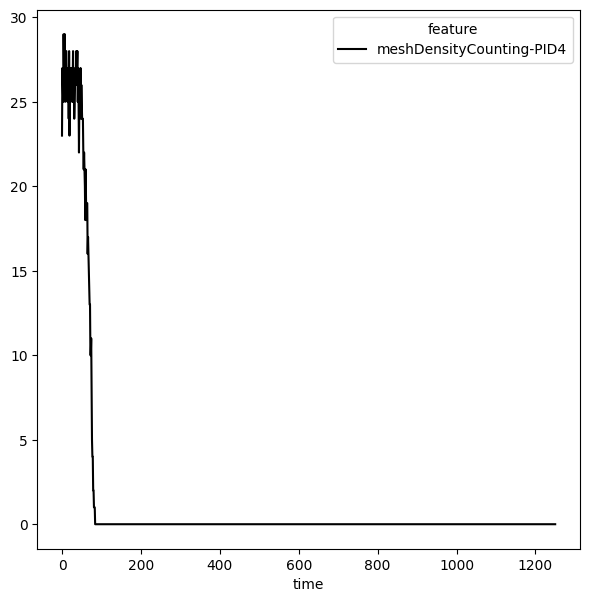

In [218]:
tsc_regular2.plot(figsize=(7, 7))

In [219]:
tsc_regular3 = TSCDataFrame.from_frame_list([ser1, ser2])
tsc_regular3

feature  meshDensityCounting-PID4
ID time                          
0  0                            0
   1                            0
   2                            2
   3                            3
   4                            6
...                           ...
1  1246                         0
   1247                         0
   1248                         0
   1249                         0
   1250                         0

[2502 rows x 1 columns]

<Axes: xlabel='time'>

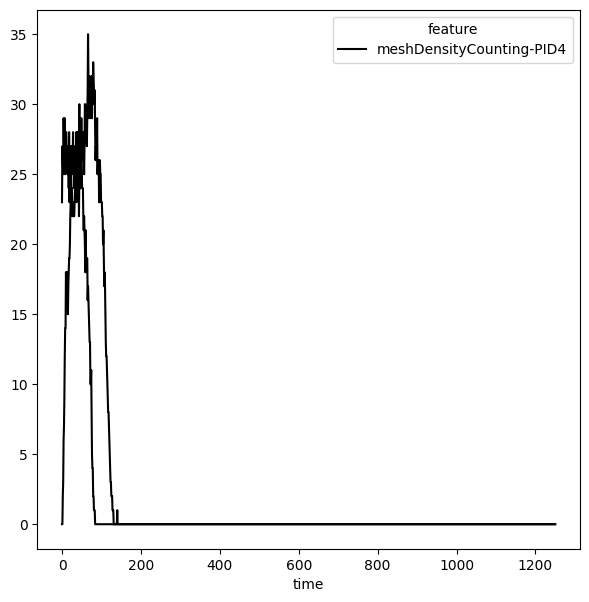

In [220]:
tsc_regular3.plot(figsize=(7, 7))

In [221]:
X_tsc=tsc_regular1
X_tsc.to_csv('input1.csv', sep='\t')

In [222]:
print(f"time delta: {X_tsc.delta_time}")
print(f"nr. time series: {X_tsc.n_timeseries}")
print(f"nr. timesteps per time series: {X_tsc.n_timesteps}")
print(f"(n_samples, n_features): {X_tsc.shape}")
print(f"time interval {X_tsc.time_interval()}")
print(f"Same time values: {X_tsc.is_same_time_values()}")
print("")
print("Data snippet fo training data:")

time delta: 1
nr. time series: 1
nr. timesteps per time series: 1251
(n_samples, n_features): (1251, 1)
time interval (0, 1250)
Same time values: True

Data snippet fo training data:


In [223]:
time_values= X_tsc.time_values()
time_values

array([   0,    1,    2, ..., 1248, 1249, 1250])

In [224]:
X_tsc.initial_states()

/home/uppili11/.local/lib/python3.10/site-packages/datafold/pcfold/timeseries/collection.py:1636: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  return self.groupby(by=TSCDataFrame.tsc_id_idx_name, axis=0, level=0).head(


,feature,meshDensityCounting-PID4
ID,time,
0,0,0


In [225]:
# function to add a single arrow in the following time series plots
idx_arrow = np.array([time_values.shape[0] // 2 - 1, time_values.shape[0] // 2])

def include_arrow(ax, df):
    arrow = df.iloc[idx_arrow, :]
    ax.arrow(
        arrow.iloc[0, 0],
        arrow.iloc[0, 0],
        dx=arrow.iloc[1, 0] - arrow.iloc[0, 0],
        dy=arrow.iloc[1, 0] - arrow.iloc[0, 0],
        color="black",
        head_width=0.05,
    )

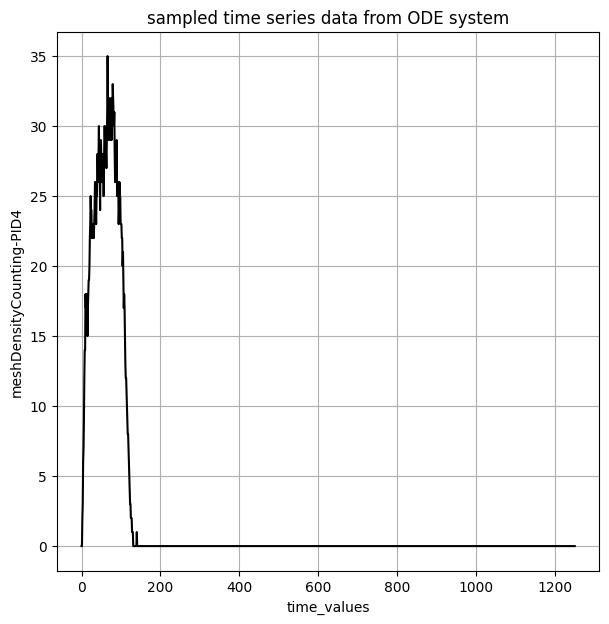

In [226]:
fig, ax = plt.subplots(figsize=[7, 7])
colors=  ['r', 'g', 'b', 'y','k', 'y']
for _id, df in X_tsc.itertimeseries():
    ax.plot(time_values, df["meshDensityCounting-PID4"].to_numpy(), 0.1, c='black')
    #include_arrow(ax, df)

ax.set_title("sampled time series data from ODE system")
ax.set_xlabel("time_values")
ax.set_ylabel("meshDensityCounting-PID4")
#ax.axis("equal")
ax.grid();

In [227]:
dmd = DMDStandard().fit(X=X_tsc, store_system_matrix=True)

# Check available attributes
attributes = [attr for attr in dir(dmd) if not callable(getattr(dmd, attr)) and not attr.startswith("__")]
print("Available Attributes:")
print(attributes)

# Print values of some common attributes
if 'dmd_modes' in attributes:
    print("DMD Modes:")
    print(dmd.dmd_modes)

if 'eigenvalues_' in attributes:
    print("Eigenvalues:")
    print(dmd.eigenvalues_)

Available Attributes:
['_abc_impl', '_cls_feature_attrs', '_cls_valid_sys_mode', '_cls_valid_sys_type', '_valid_reconstruct_modes', 'approx_generator', 'compute_pseudospectrum', 'control_matrix_', 'diagonalize', 'dmd_modes', 'dt_', 'eigenvalues_', 'eigenvectors_left_', 'eigenvectors_right_', 'feature_names_in_', 'is_control_affine', 'is_controlled', 'is_differential_system', 'is_flowmap_system', 'is_matrix_mode', 'is_spectral_mode', 'is_time_invariant', 'n_features_in_', 'rank', 'rcond', 'reconstruct_mode', 'residual_filter', 'sys_mode', 'sys_type', 'system_matrix_']
DMD Modes:
[[1.]]
Eigenvalues:
[1.]


In [228]:
dmd = DMDStandard().fit(
    X=X_tsc, store_system_matrix=True
)  # X must be of type TSCDataFrame
dmd_values = dmd.predict(X_tsc.initial_states(), time_values=X_tsc.time_values())

#dmd_values_oos = dmd.predict(np.array([0]), time_values=np.linspace(0, 100, 1250))

print(
    "Data snipped for predicted time series training data and out-of-sample prediction"
)
dmd_values

Data snipped for predicted time series training data and out-of-sample prediction


/home/uppili11/.local/lib/python3.10/site-packages/datafold/pcfold/timeseries/collection.py:1636: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  return self.groupby(by=TSCDataFrame.tsc_id_idx_name, axis=0, level=0).head(
/home/uppili11/.local/lib/python3.10/site-packages/datafold/pcfold/timeseries/collection.py:1666: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  return self.groupby(by=TSCDataFrame.tsc_id_idx_name, axis=0, level=0).tail(


feature  meshDensityCounting-PID4
ID time                          
0  0                          0.0
   1                          0.0
   2                          0.0
   3                          0.0
   4                          0.0
...                           ...
   1246                       0.0
   1247                       0.0
   1248                       0.0
   1249                       0.0
   1250                       0.0

[1251 rows x 1 columns]

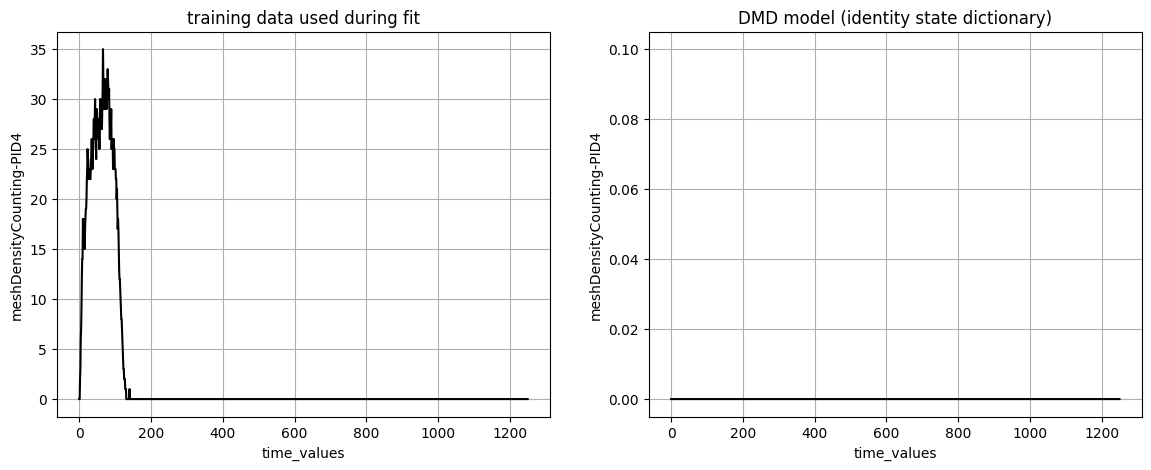

In [229]:
f, ax = plt.subplots(1, 2, figsize=(14, 5))
for _id, df in X_tsc.itertimeseries():
    ax[0].plot(time_values, df["meshDensityCounting-PID4"].to_numpy(), 0.1, c="black")
    #include_arrow(ax[0], df)

ax[0].set_title("training data used during fit")
ax[0].set_xlabel("time_values")
ax[0].set_ylabel("meshDensityCounting-PID4")
#ax[0].axis("equal")
ax[0].grid()

for _id, df in dmd_values.itertimeseries():
    ax[1].plot(time_values, df["meshDensityCounting-PID4"].to_numpy(), 0.1, c="black")
    #include_arrow(ax[1], df)

ax[1].set_title("DMD model (identity state dictionary)")
ax[1].set_xlabel("time_values")
ax[1].set_ylabel("meshDensityCounting-PID4")
#ax[1].axis("equal")
ax[1].grid()